<a href="https://colab.research.google.com/github/ritikgupta65/Accommodating-Insights/blob/main/CNN%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:06<00:00, 244MB/s]
100% 1.06G/1.06G [00:06<00:00, 164MB/s]


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D , Flatten , Dense , MaxPooling2D ,BatchNormalization ,Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory( # we are using generator  it will train out datset in batchs
directory = '/content/train',
    labels= 'inferred',
    label_mode  = 'int' , #0 for cat and 1 for dog
    batch_size = 32 ,
    image_size = (256,256)

)
test_ds = keras.utils.image_dataset_from_directory(
directory = '/content/test',
    labels= 'inferred',
    label_mode  = 'int' , #0 for cat and 1 for dog
    batch_size = 32 ,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# files sored are in numpy array and between 0 and 256
# we have to normalize it between 0 and 1

In [6]:
# normalize
def process(image ,label):
  image = tf.cast(image/255. , tf.float32)
  return image , label
train_ds = train_ds.map(process)# it will extract a image from traning ds and give to process function and then return
test_ds = test_ds.map(process)


In [7]:
# we will add three convolutional layers 32 ,64 ,128
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid' , activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) ,strides =2 , padding = 'valid'))

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) ,strides =2 , padding = 'valid'))

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) ,strides =2 , padding = 'valid'))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1 , activation = 'sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds , epochs =10 ,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 58s 86ms/step - loss: 0.7688 - accuracy: 0.6367 - val_loss: 1.2172 - val_accuracy: 0.5150
Epoch 2/10
625/625 [==============================] - 50s 80ms/step - loss: 0.5031 - accuracy: 0.7527 - val_loss: 0.4898 - val_accuracy: 0.7758
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4184 - accuracy: 0.8055 - val_loss: 0.4466 - val_accuracy: 0.7922
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.3398 - accuracy: 0.8487 - val_loss: 0.4629 - val_accuracy: 0.7800
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2407 - accuracy: 0.8981 - val_loss: 0.6010 - val_accuracy: 0.7750
Epoch 6/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1585 - accuracy: 0.9367 - val_loss: 0.7247 - val_accuracy: 0.7796
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1028 - accuracy: 0.9613 - val_loss: 0.9761 - val_accuracy:

In [ ]:
# how to reduc the overfitting
# we can add dropout layer ->in this we will use
# add more data
# data augmentation->by using our model we creat more data
# l1/l2_regularisation
# batch_norm_->thisalso
# reduce comlexity

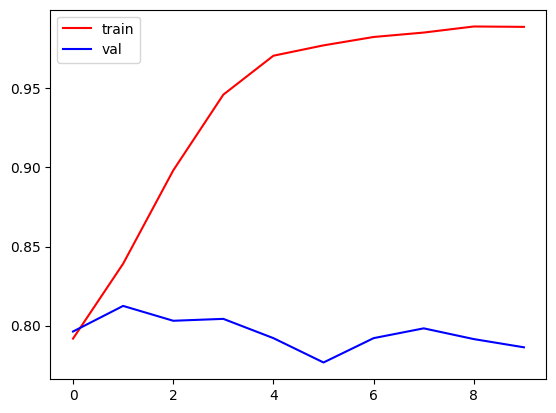

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'] , color = 'blue' , label = 'val')
plt.legend()
plt.show()

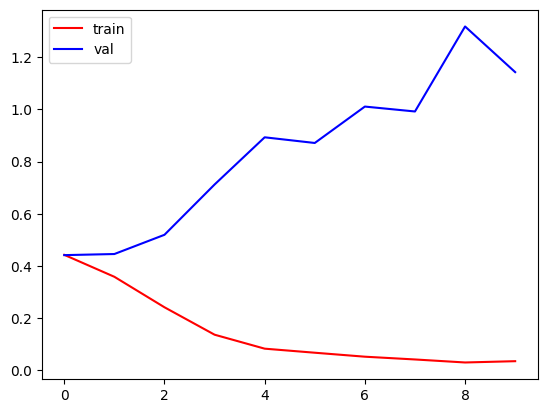

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , color = 'red' , label = 'train')
plt.plot(history.history['val_loss'] , color = 'blue' , label = 'val')
plt.legend()
plt.show()

In [ ]:
#new graphs

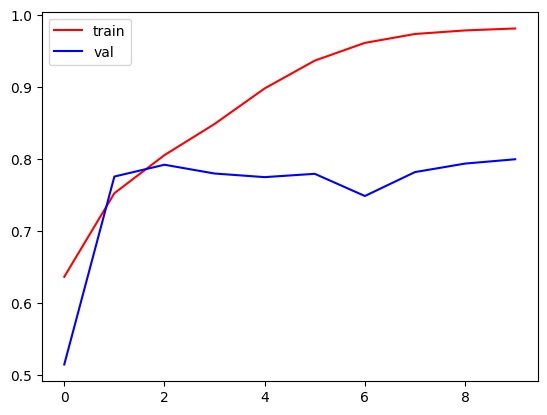

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'] , color = 'blue' , label = 'val')
plt.legend()
plt.show()

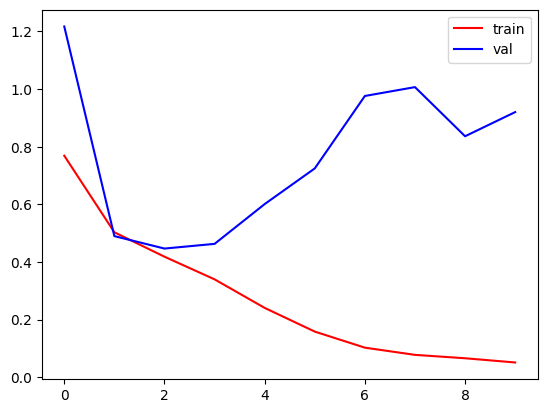

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , color = 'red' , label = 'train')
plt.plot(history.history['val_loss'] , color = 'blue' , label = 'val')
plt.legend()
plt.show()

In [ ]:
import cv2

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

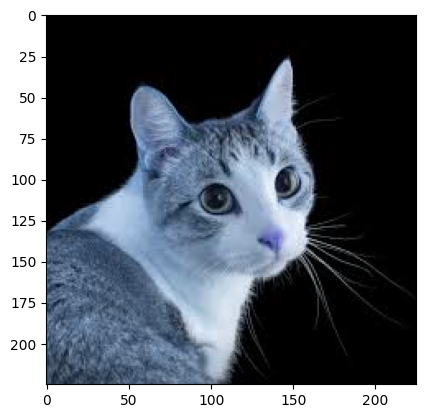

In [ ]:
test_img = cv2.imread('/content/cat.jpeg')
plt.imshow(test_img)
test_img = cv2.resize(test_img , (256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

## data augmentation

In [12]:
batch_size =16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen =ImageDataGenerator(
    zoom_range = 0.2,
    horizontal_flip = True,
   shear_range = 0.2,
   fill_mode = 'nearest',
    rescale = 1./255
)
test_datagen =ImageDataGenerator(
    rescale = 1./255

)

In [18]:
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (256,256),
    batch_size = batch_size,
    class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (256,256),
    batch_size = batch_size,
    class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [21]:
model.fit_generator(
    train_generator ,
    steps_per_epoch = 500,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = 200
)

<ipython-input-21-d7b822cb4427>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
500/500 [==============================] - 129s 257ms/step - loss: 0.7243 - accuracy: 0.6112 - val_loss: 0.6299 - val_accuracy: 0.6550
Epoch 2/10
500/500 [==============================] - 130s 260ms/step - loss: 0.6053 - accuracy: 0.6756 - val_loss: 0.6444 - val_accuracy: 0.6097
Epoch 3/10
500/500 [==============================] - 129s 258ms/step - loss: 0.5672 - accuracy: 0.7034 - val_loss: 0.5839 - val_accuracy: 0.7028
Epoch 4/10
500/500 [==============================] - 133s 265ms/step - loss: 0.5370 - accuracy: 0.7276 - val_loss: 0.5055 - val_accuracy: 0.7538
Epoch 5/10
500/500 [==============================] - 133s 266ms/step - loss: 0.5072 - accuracy: 0.7504 - val_loss: 0.4942 - val_accuracy: 0.7606
Epoch 6/10
500/500 [==============================] - 130s 261ms/step - loss: 0.4900 - accuracy: 0.7644 - val_loss: 0.4836 - val_accuracy: 0.7641
Epoch 7/10
500/500 [==============================] - 129s 258ms/step - loss: 0.4722 - accuracy: 0.7768 - val_loss: 0.4696 -